# Chapter 11: Two Landmark Quantum Algorithms

---

**Note:** This notebook corresponds to Chapter 7 of the textbook.

**Prerequisites:**
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [4]:
# Setup and imports
import numpy as np
import math
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.circuit.library import ZGate
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit.circuit.library import grover_operator
from qiskit.quantum_info import Statevector, Operator
from Chapter03_EngineeringOptimization_functions import (truss2x2,truss3x2,truss2x3,truss3x3,truss_grid,truss_10bar)
from Chapter08_QuantumGates_functions import simulate_statevector,  simulate_measurements, analyzeCircuitForSimulator, analyzeCircuitForHardware
from Chapter11_LandmarkAlgorithms_functions import (bv_secret_circuit, grover_secret_circuit)


## Phase Kickback Barebones

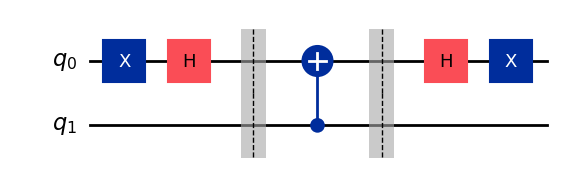

In [9]:
circuit = QuantumCircuit(2)  
circuit.x(0)
circuit.h(0)
circuit.barrier()
circuit.cx(1,0)
circuit.barrier()
circuit.h(0)
circuit.x(0)
display(circuit.draw('mpl'))

## Phase Kickback Example

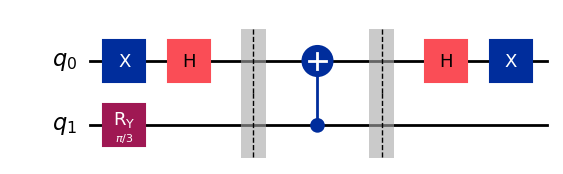

<IPython.core.display.Latex object>

In [8]:
circuit = QuantumCircuit(2)  
circuit.x(0)
circuit.h(0)
circuit.ry(theta = np.pi/3, qubit=1) 
circuit.barrier()
circuit.cx(1,0)
circuit.barrier()
circuit.h(0)
circuit.x(0)
display(circuit.draw('mpl'))
psi = Statevector(circuit)
display(psi.draw('latex'))

## Phase Oracle

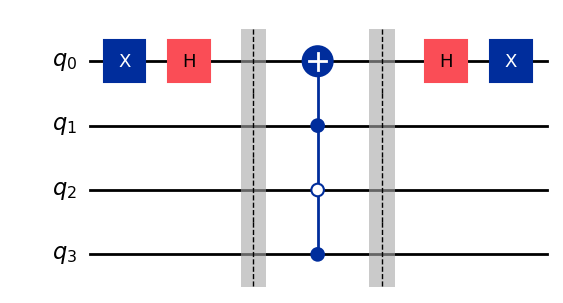

<IPython.core.display.Latex object>

In [10]:
# 4 Qubits: q0 is Ancilla, q1-q3 are Input
circuit = QuantumCircuit(4)

# 1. Prepare Ancilla (q0) in the |-> state
circuit.x(0)
circuit.h(0)
circuit.barrier()

# 2. Phase Oracle for |101> 
# Input register is (q3, q2, q1). For |101>, q2 must be flipped.
circuit.mcx([1, 2, 3], 0, ctrl_state = '101')   # Controls: q1,q2,q3. Target: q0
circuit.barrier()

# 3. Clean up Ancilla to return it to |0>
circuit.h(0)
circuit.x(0)

display(circuit.draw('mpl'))

# Verify the result
# The statevector will show a negative sign on the |1010> state 
# (where the last 0 is the ancilla q0)
psi = Statevector(circuit)
display(psi.draw('latex'))

## Phase oracle example

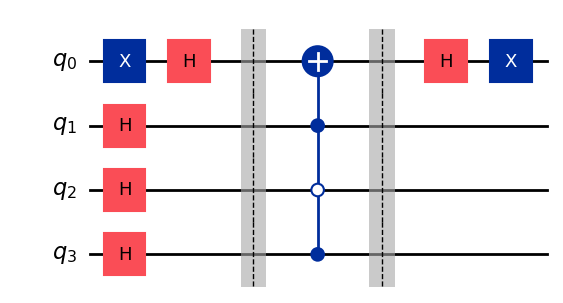

<IPython.core.display.Latex object>

In [19]:
# 4 Qubits: q0 is Ancilla, q1-q3 are Input
circuit = QuantumCircuit(4)

# 1. Prepare Ancilla (q0) in the |-> state
circuit.x(0)
circuit.h(0)

for qubit in [1, 2, 3]:
    circuit.h(qubit)
circuit.barrier()
# 2. Phase Oracle for |101> 
# Input register is (q3, q2, q1). For |101>, q2 must be flipped.
circuit.mcx([1, 2, 3], 0, ctrl_state = '101')   # Controls: q1,q2,q3. Target: q0
circuit.barrier()

# 3. Clean up Ancilla to return it to |0>
circuit.h(0)
circuit.x(0)
display(circuit.draw('mpl'))

# Verify the result
# The statevector will show a negative sign on the |1010> state 
# (where the last 0 is the ancilla q0)
psi = Statevector(circuit)
display(psi.draw('latex'))



## Parity oracle barebones

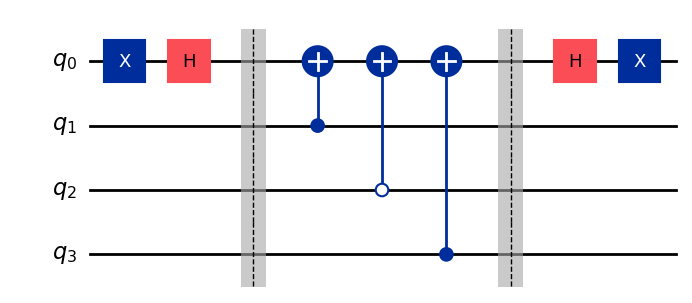

<IPython.core.display.Latex object>

In [20]:
# 4 Qubits: q0 is Ancilla, q1-q3 are Input
circuit = QuantumCircuit(4)

# 1. Prepare Ancilla (q0) in the |-> state
circuit.x(0)
circuit.h(0)
circuit.barrier()

# 2. Phase Oracle for |101> 
# Input register is (q3, q2, q1). For |101>, q2 must be flipped.
circuit.cx(1,0,ctrl_state='1')   # Flip q0 if q1 is 1
circuit.cx(2,0,ctrl_state='0')   # Flip q0 if q2 is 0
circuit.cx(3,0,ctrl_state='1')   # Flip q0 if q3 is 1
circuit.barrier()

# 3. Clean up Ancilla to return it to |0>
circuit.h(0)
circuit.x(0)

display(circuit.draw('mpl'))

# Verify the result
# The statevector will show a negative sign on the |1010> state 
# (where the last 0 is the ancilla q0)
psi = Statevector(circuit)
display(psi.draw('latex'))

## Parity Oracle example

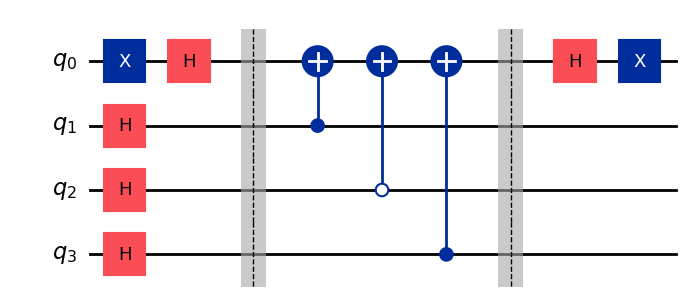

<IPython.core.display.Latex object>

In [21]:
# 4 Qubits: q0 is Ancilla, q1-q3 are Input
circuit = QuantumCircuit(4)

# 1. Prepare Ancilla (q0) in the |-> state
circuit.x(0)
circuit.h(0)
for qubit in [1, 2, 3]:
    circuit.h(qubit)
circuit.barrier()

# 2. Phase Oracle for |101> 
# Input register is (q3, q2, q1). For |101>, q2 must be flipped.
circuit.cx(1,0,ctrl_state='1')   # Flip q0 if q1 is 1
circuit.cx(2,0,ctrl_state='0')   # Flip q0 if q2 is 0
circuit.cx(3,0,ctrl_state='1')   # Flip q0 if q3 is 1
circuit.barrier()

# 3. Clean up Ancilla to return it to |0>
circuit.h(0)
circuit.x(0)

display(circuit.draw('mpl'))

# Verify the result
# The statevector will show a negative sign on the |1010> state 
# (where the last 0 is the ancilla q0)
psi = Statevector(circuit)
display(psi.draw('latex'))

## BV Secret circuit

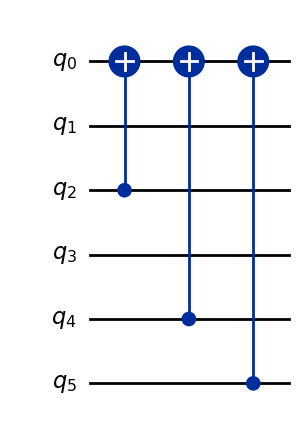

In [2]:
U, n = bv_secret_circuit()

## Berstein Vazarani Algorithm 

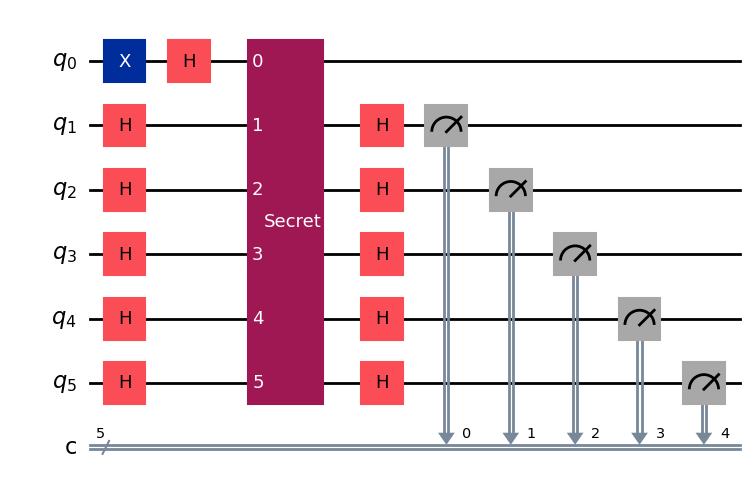

{'11010': 1}
The total depth is  5
The total width is  11


In [3]:
circuit = QuantumCircuit(n+1,n)
circuit.x(0) 
circuit.h(0) # This brings qubit 0 to |-> state
circuit.h(range(1,n+1)) 
circuit.unitary(U,range(n+1),'Secret')
circuit.h(range(1,n+1))
circuit.measure(range(1,n+1), range(0,n)) 
display(circuit.draw('mpl')) 
counts = simulate_measurements(circuit,shots = 1)
print(counts)
print("The total depth is ", circuit.depth())
print("The total width is ", circuit.width())

## Grover algorithm

In [4]:

oracle = grover_secret_circuit()
grover_op = grover_operator(oracle)
nQubits = grover_op.num_qubits
N = 2**nQubits
K = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / N))))
print("Optimal number of Grover iterations:", K)
qc = QuantumCircuit(grover_op.num_qubits)

qc.h(range(grover_op.num_qubits)) # Create  superposition of all basis states
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(K), inplace=True)
qc.measure_all()

counts = simulate_measurements(qc,shots = 1000)
print(counts)

Optimal number of Grover iterations: 4
{'11010': 999, '00101': 1}
